<a href="https://colab.research.google.com/github/JuniorRF19/Predictive_Maintenance/blob/main/Predictive_Maintenance_Naval_Vessel_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de Mantenimiento Predictivo: Condición del Buque Naval

En este proyecto, nuestro objetivo es predecir los coeficientes de estado de descomposición del compresor de la turbina de gas y de la turbina de gas utilizando un conjunto de datos de mantenimiento predictivo de un buque naval. Exploraremos y visualizaremos los datos, realizaremos ingeniería de características y aplicaremos modelos de aprendizaje automático para lograr predicciones precisas. Este enfoque permitirá un mantenimiento más eficiente y rentable, mejorando la seguridad y la operatividad del buque.

## Diccionario de Datos

| Columna                                                   | Tipo     | Descripción                                                                                       |
|-----------------------------------------------------------|----------|---------------------------------------------------------------------------------------------------|
| `index`                                                   | int64    | Índice del registro                                                                               |
| `Lever position`                                          | float64  | Posición de la palanca                                                                            |
| `Ship speed (v)`                                          | int64    | Velocidad del barco                                                                               |
| `Gas Turbine (GT) shaft torque (GTT) [kN m]`              | float64  | Torque del eje de la turbina de gas                                                               |
| `GT rate of revolutions (GTn) [rpm]`                      | float64  | Tasa de revoluciones de la turbina de gas                                                         |
| `Gas Generator rate of revolutions (GGn) [rpm]`           | float64  | Tasa de revoluciones del generador de gas                                                         |
| `Starboard Propeller Torque (Ts) [kN]`                    | float64  | Torque de la hélice de estribor                                                                   |
| `Port Propeller Torque (Tp) [kN]`                         | float64  | Torque de la hélice de babor                                                                      |
| `Hight Pressure (HP) Turbine exit temperature (T48) [C]`  | float64  | Temperatura de salida de la turbina de alta presión                                               |
| `GT Compressor inlet air temperature (T1) [C]`            | int64    | Temperatura de entrada del compresor de la turbina de gas                                         |
| `GT Compressor outlet air temperature (T2) [C]`           | float64  | Temperatura de salida del compresor de la turbina de gas                                          |
| `HP Turbine exit pressure (P48) [bar]`                    | float64  | Presión de salida de la turbina de alta presión                                                   |
| `GT Compressor inlet air pressure (P1) [bar]`             | float64  | Presión de entrada del compresor de la turbina de gas                                             |
| `GT Compressor outlet air pressure (P2) [bar]`            | float64  | Presión de salida del compresor de la turbina de gas                                              |
| `GT exhaust gas pressure (Pexh) [bar]`                    | float64  | Presión de los gases de escape de la turbina de gas                                               |
| `Turbine Injecton Control (TIC) [%]`                      | float64  | Control de inyección de la turbina                                                                |
| `Fuel flow (mf) [kg/s]`                                   | float64  | Flujo de combustible                                                                              |
| `GT Compressor decay state coefficient`                   | float64  | Coeficiente de estado de descomposición del compresor de la turbina de gas                        |
| `GT Turbine decay state coefficient`                      | float64  | Coeficiente de estado de descomposición de la turbina de gas                                      |


#Librerias

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Carga de Datos

In [3]:
filename = "/content/drive/MyDrive/CodingDojo/Bootcamp - Data Science/Modulo 2/Proyecto 2/data.csv"
df = pd.read_csv(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

#EDA

In [5]:
df= df.drop("index",axis=1)

Se elimina el indice, ya que no aporta informacion relevante.

In [6]:
df.isnull().sum()

Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]                                       0
GT Compr

No se encontraron valores nulos en el data frame.

In [8]:
df.duplicated().sum()

0

No se encuentra valores duplicados en el data set.

In [ ]:
# @title Valores Promedios Segun Velocidad
df.groupby(['Ship speed (v) ']).mean()

,Lever position,Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
Ship speed (v),,,,,,,,,,,,,,,,,
3,1.138,3281.528724,1366.007719,6669.277436,8.478118,8.478118,540.880612,288.0,558.911525,1.206244,0.998,6.505274,1.019000,10.165824,0.181066,0.975,0.9875
6,2.088,4682.143786,1369.016456,6799.948431,26.826943,26.826943,551.684737,288.0,565.512179,1.260103,0.998,6.793188,1.019555,10.446087,0.195072,0.975,0.9875
9,3.144,8377.431784,1386.747247,7087.297873,60.335590,60.335590,584.497194,288.0,580.308297,1.390189,0.998,7.494480,1.020198,12.243704,0.242367,0.975,0.9875
12,4.161,14721.318140,1547.458745,7760.807912,113.764646,113.764646,638.964529,288.0,606.386354,1.660046,0.998,8.918044,1.022569,17.121933,0.338943,0.975,0.9875
15,5.140,21630.633661,1924.327051,8482.236522,175.266665,175.266665,706.113474,288.0,637.179499,2.082868,0.998,11.092522,1.026268,25.076540,0.496384,0.975,0.9875
18,6.175,29778.070892,2307.104707,8814.053750,246.118330,246.118330,773.483649,288.0,667.518262,2.506508,0.998,13.230566,1.030317,34.204359,0.677198,0.975,0.9875
21,7.148,38993.194502,2678.057293,9126.512345,332.270643,332.270643,825.115646,288.0,690.031752,2.972800,0.998,15.548333,1.035521,43.978479,0.870743,0.975,0.9875
24,8.206,50993.701427,3087.480047,9308.743719,438.030778,438.030778,922.365088,288.0,731.807375,3.584128,0.998,18.456495,1.041508,60.248571,1.192735,0.975,0.9875
27,9.300,72769.465251,3560.404042,9759.647824,644.930200,644.930200,1076.354087,288.0,778.282737,4.513778,0.998,22.635207,1.050328,89.285851,1.767451,0.975,0.9875


Valores promedios dependiendo de la velocidad del barco.

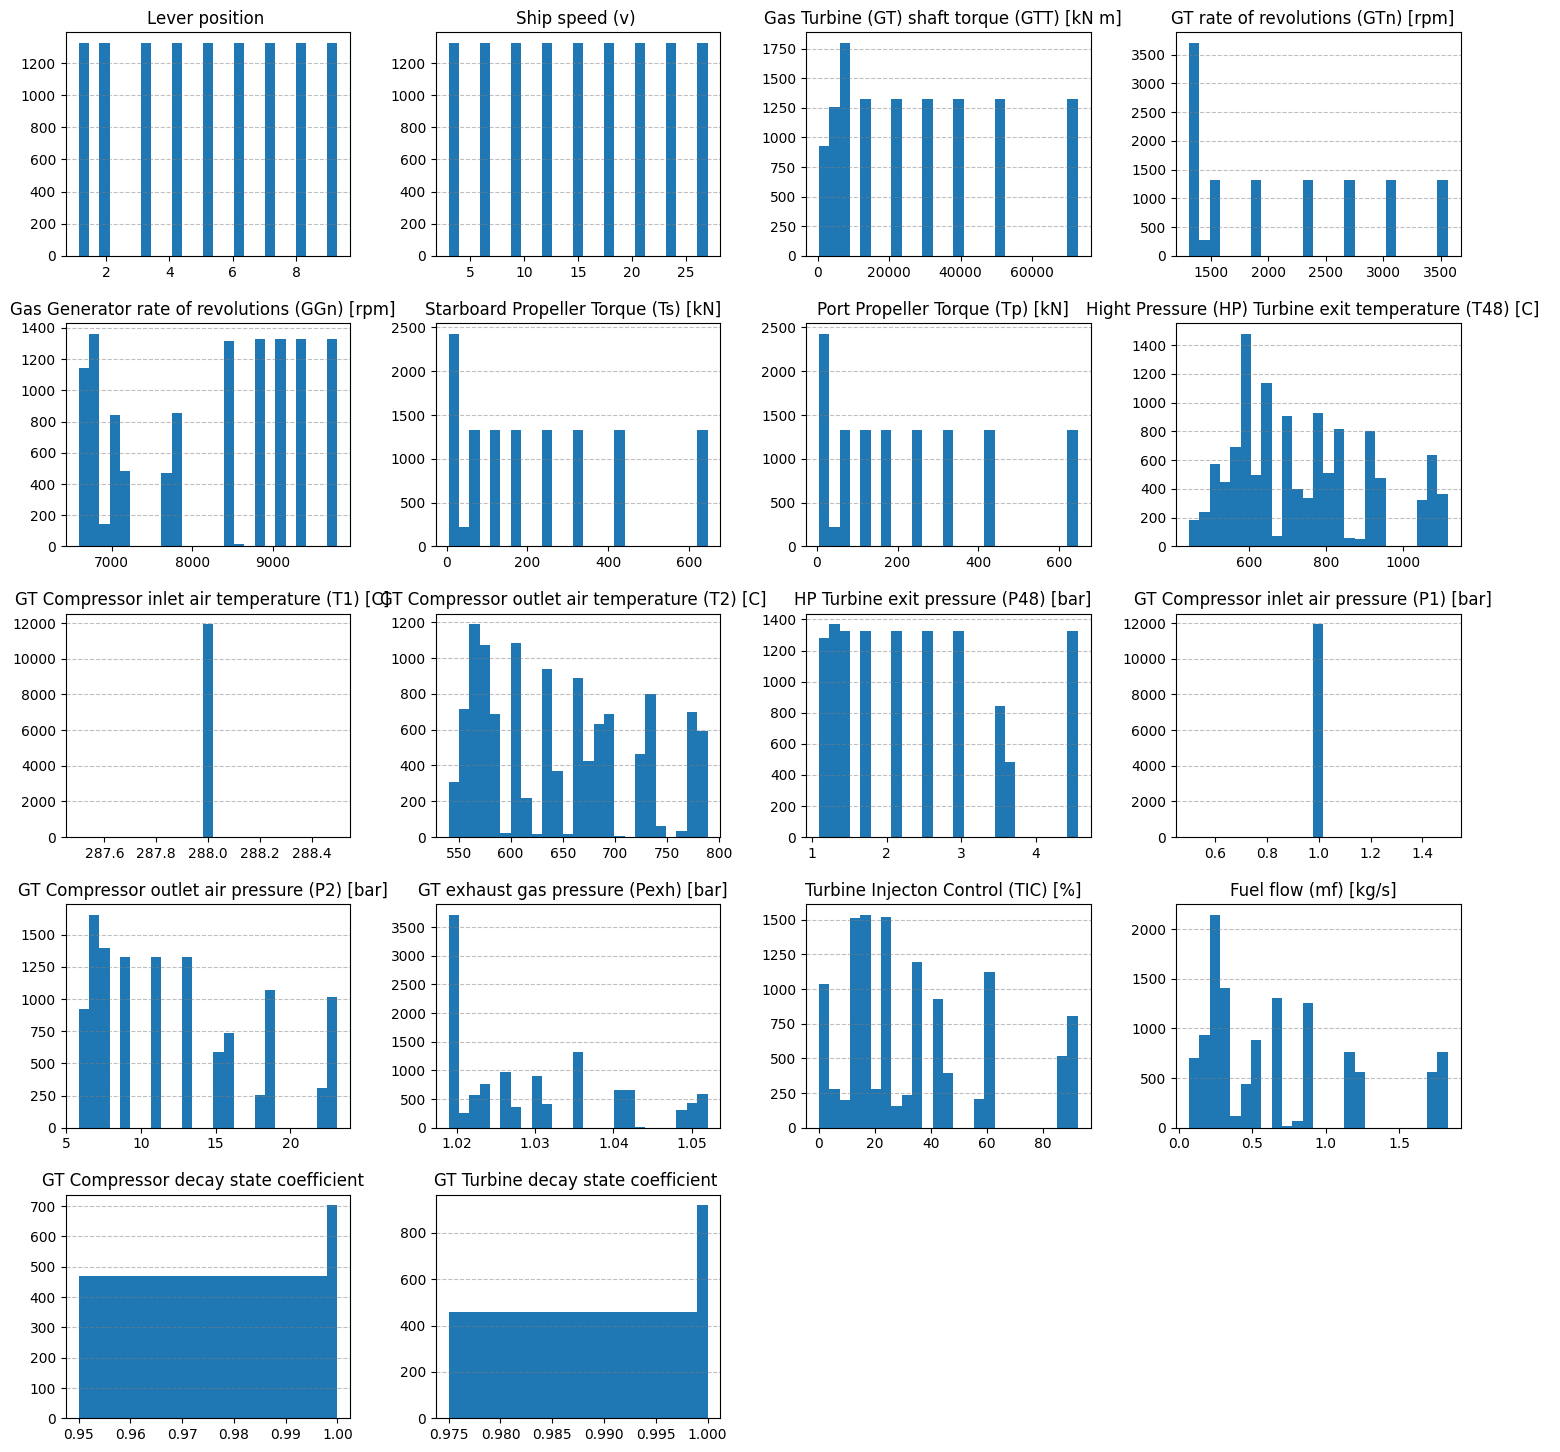

In [10]:
# @title Histograma de variables
df.hist(bins=25, figsize=(18, 18), xlabelsize=10, ylabelsize=10, grid=False)
for ax in plt.gcf().get_axes():
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
plt.show()

Se observa que en la columna "GT Compressor inlet air temperature (T1) [C]" y "GT Compressor inlet air pressure (P1) [bar]" parece haber dos valores constantes.

In [23]:
df.describe()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


No se encuentran valores atipicos en los datos.

In [26]:
df['GT Compressor inlet air temperature (T1) [C]\xa0 '].value_counts()

GT Compressor inlet air temperature (T1) [C]  
288    11934
Name: count, dtype: int64

In [27]:
df['GT Compressor inlet air pressure (P1) [bar]\xa0 '].value_counts()

GT Compressor inlet air pressure (P1) [bar]  
0.998    11934
Name: count, dtype: int64

Se confirma que las columnas antes mencionadas tienen un solo valor, las cuales son 288 °C para la temperatura de ingreso al compresor y una presion de entrada en la compresor de 0.998 bar. Como son valores repetitivos se eliminaran las columnas, ya que no aportan informacion nueva. Ademas, se busca simplificar el modelo y reducir la dimensionalidad del conjunto de datos. Pero al momento de poner en produccion el modelo es necesario especificar que para que el modelo sea efectivo se debe tener esas condiciones iniciales del trabajo.

In [28]:
df= df.drop(columns = ['GT Compressor inlet air temperature (T1) [C]\xa0 ','GT Compressor inlet air pressure (P1) [bar]\xa0 '],axis=1)

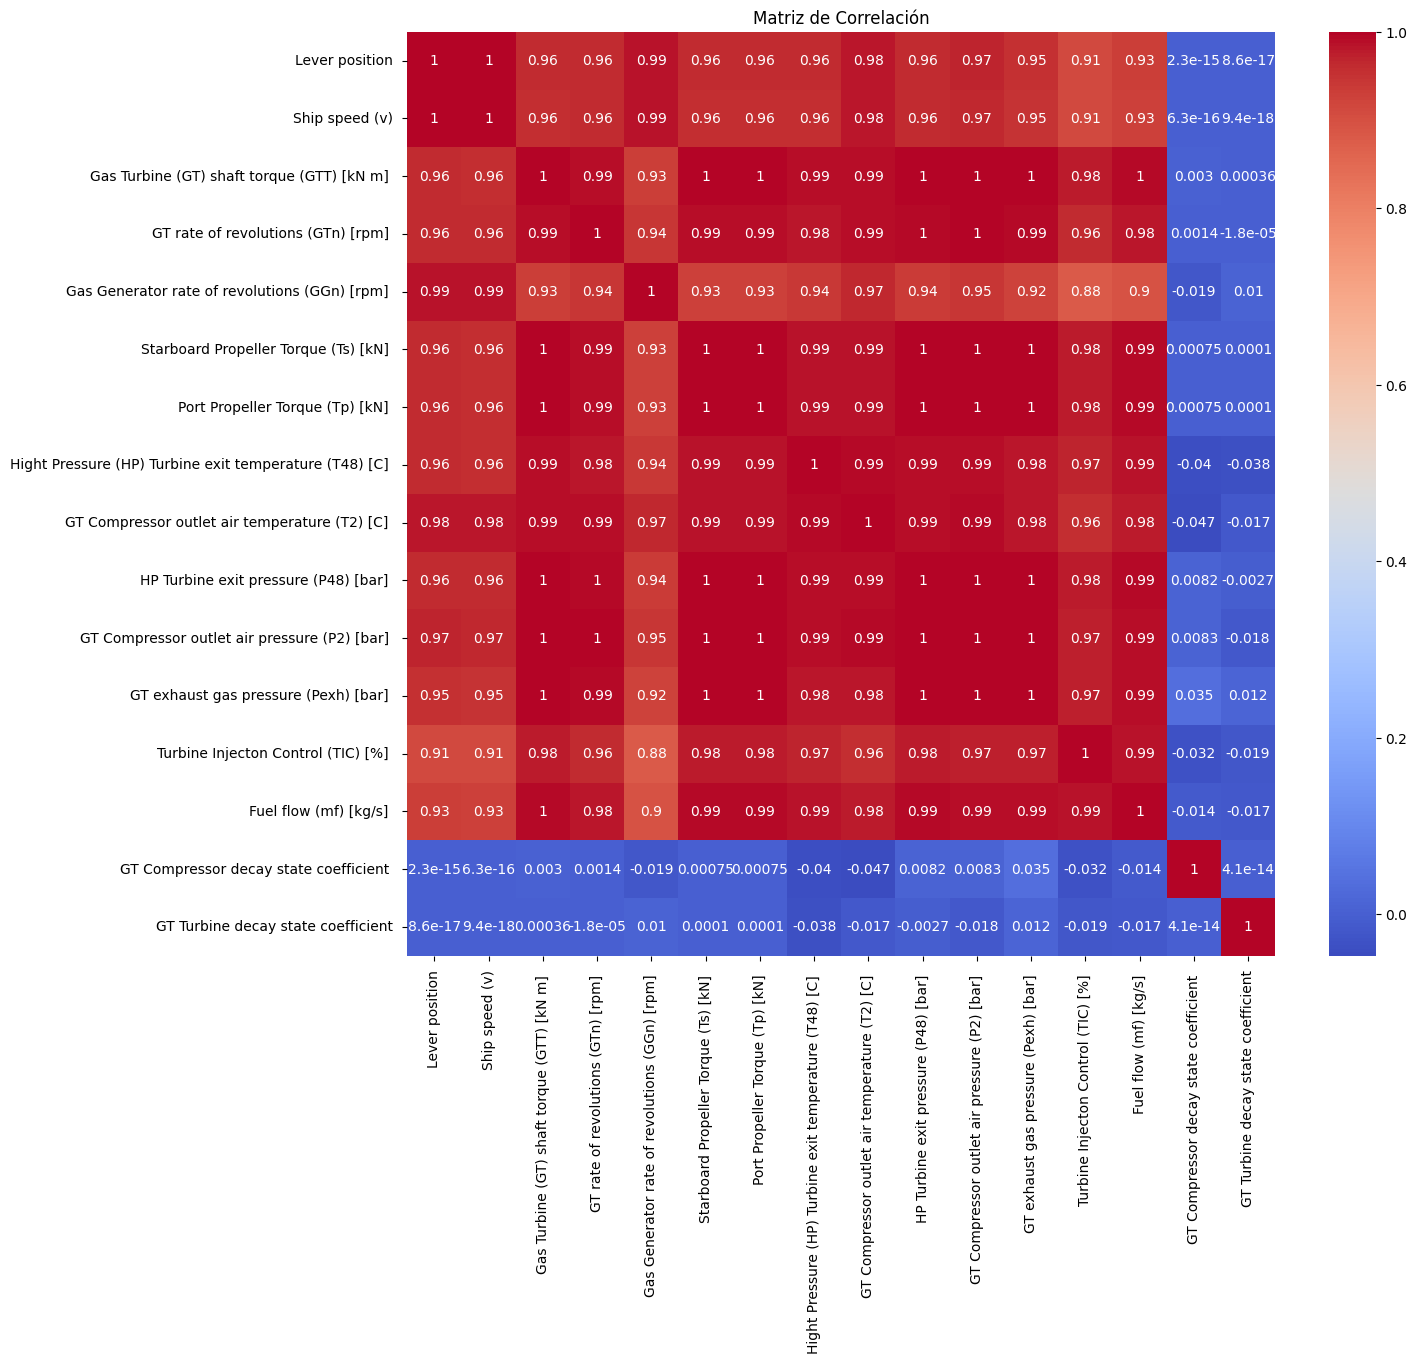

In [29]:
# @title Matriz de Correlación
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Podemos observar una alta correlacion entre todas las variables inplicadas en el proceso. No se eliminara ninguna columna y procedera a desarrollar los modelos para predecir los coeficientes de descomposicion de la turbina y compresor.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lever position                                            11934 non-null  float64
 1   Ship speed (v)                                            11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 3   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null  float64
 8   GT Compressor ou

In [45]:
df.iloc[:, 15]

0        0.975
1        0.975
2        0.975
3        0.975
4        0.975
         ...  
11929    1.000
11930    1.000
11931    1.000
11932    1.000
11933    1.000
Name: GT Turbine decay state coefficient , Length: 11934, dtype: float64

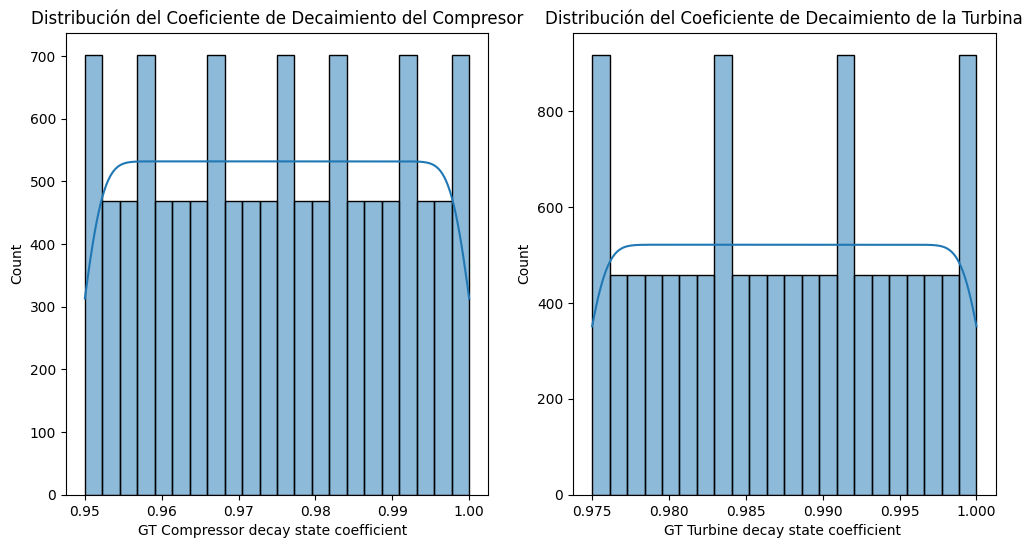

In [46]:
# @title Distribución de los coeficientes de descomposición
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['GT Compressor decay state coefficient\xa0 '], kde=True)
plt.title('Distribución del Coeficiente de Decaimiento del Compresor')

plt.subplot(1, 2, 2)
sns.histplot(df.iloc[:, 15], kde=True)
plt.title('Distribución del Coeficiente de Decaimiento de la Turbina')

plt.show()

*   Los coeficientes de descomposición del compresor y la turbina están principalmente en los rangos del 95% al 100% y del 97.5% al 100%, respectivamente.
*   Dado que los datos están concentrados en estos rangos, es probable que el modelo no pueda predecir de manera precisa valores fuera de estos rangos. Esto es una limitación inherente del conjunto de datos y debe ser tenido en cuenta al interpretar los resultados del modelo.

#Ingeniería de Características

In [62]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
y_compressor = df['GT Compressor decay state coefficient\xa0 ']
y_turbine = df.iloc[:, 15]

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X_scaled)

In [94]:
print(f'Número de componentes antes de PCA: {X.shape[1]}')
print(f'Número de componentes después de PCA: {X_pca.shape[1]}')

Número de componentes antes de PCA: 14
Número de componentes después de PCA: 1


#Modelado

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

**Usando PCA**

In [96]:
# @title Coeficiente Compresor
X_train, X_test, y_compressor_train, y_compressor_test = train_test_split(X_pca, y_compressor, test_size=0.3, random_state=42)
X_train, X_test, y_turbine_train, y_turbine_test = train_test_split(X_pca, y_turbine, test_size=0.3, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_compressor_train)
rf.fit(X_train, y_compressor_train)

y_compressor_pred_lr = lr.predict(X_test)
y_compressor_pred_rf = rf.predict(X_test)

mse_lr = mean_squared_error(y_compressor_test, y_compressor_pred_lr)
r2_lr = r2_score(y_compressor_test, y_compressor_pred_lr)

mse_rf = mean_squared_error(y_compressor_test, y_compressor_pred_rf)
r2_rf = r2_score(y_compressor_test, y_compressor_pred_rf)

print(f'Regresión Lineal - MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Regresión Lineal - MSE: 0.0002158780070270005, R2: -0.001435103618482536
Random Forest - MSE: 0.00017155747428915209, R2: 0.20416313172747536


Sin PCA COMPRESOR:

Regresión Lineal - MSE: 3.458417057202117e-05, R2: 0.8395677127220305


Random Forest - MSE: 8.929748673554302e-07, R2: 0.9958575846093163


Con PCA COMPRESOR:

Regresión Lineal - MSE: 0.0002158780070270005, R2: -0.001435103618482536


Random Forest - MSE: 0.00017155747428915209, R2: 0.20416313172747536

In [92]:
# @title Coeficiente Turbina
lr.fit(X_train, y_turbine_train)
rf.fit(X_train, y_turbine_train)

y_turbine_pred_lr = lr.predict(X_test)
y_turbine_pred_rf = rf.predict(X_test)

mse_lr = mean_squared_error(y_turbine_test, y_turbine_pred_lr)
r2_lr = r2_score(y_turbine_test, y_turbine_pred_lr)

mse_rf = mean_squared_error(y_turbine_test, y_turbine_pred_rf)
r2_rf = r2_score(y_turbine_test, y_turbine_pred_rf)

print(f'Regresión Lineal (Turbina) - MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest (Turbina) - MSE: {mse_rf}, R2: {r2_rf}')

Regresión Lineal (Turbina) - MSE: 5.672562385435799e-05, R2: 0.00020600263657799545
Random Forest (Turbina) - MSE: 8.68538394303274e-06, R2: 0.8469193612866073


SIN PCA TURBINA:

Regresión Lineal (Turbina) - MSE: 5.182956214006074e-06, R2: 0.9086499511285213


Random Forest (Turbina) - MSE: 4.888162524434024e-07, R2: 0.991384571525183

CON PCA TURBINA:


Regresión Lineal (Turbina) - MSE: 5.68074522980256e-05, R2: -0.0012362307181845722


Random Forest (Turbina) - MSE: 4.736722166237555e-05, R2: 0.1651486458497986

Parece que el uso de PCA esta eliminando demasiada informacion importante. Por esto, se desarrollaran los modelos sin hacer uso de PCA.

**Sin PCA**

In [156]:
X_train, X_test, y_compressor_train, y_compressor_test = train_test_split(X_scaled, y_compressor, test_size=0.2, random_state=42)
X_train, X_test, y_turbine_train, y_turbine_test = train_test_split(X_scaled, y_turbine, test_size=0.2, random_state=42)

#Linear Regression

In [157]:
# @title Linear Regression Compressor
lr = LinearRegression()
lr.fit(X_train, y_compressor_train)
y_compressor_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_compressor_test, y_compressor_pred_lr)
r2_lr = r2_score(y_compressor_test, y_compressor_pred_lr)

print(f'Regresión Lineal (Compresor) - MSE: {mse_lr}, R2: {r2_lr}')
print(f'Score de entrenamiento: {lr.score(X_train, y_compressor_train)}')
print(f'Score de test: {lr.score(X_test,y_compressor_test)}')

Regresión Lineal (Compresor) - MSE: 3.4157452087762786e-05, R2: 0.8411075946513599
Score de entrenamiento: 0.8434153172219796
Score de test: 0.8411075946513599


Regresión Lineal (Compresor) - MSE: 3.415745208748096e-05, R2: 0.8411075946526708
Score de entrenamiento: 0.8434153172219799
Score de test: 0.8411075946526708

In [103]:
# @title Linear Regression Turbine
lr.fit(X_train, y_turbine_train)
y_turbine_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_turbine_test, y_turbine_pred_lr)
r2_lr = r2_score(y_turbine_test, y_turbine_pred_lr)

print(f'Regresión Lineal (Turbina) - MSE: {mse_lr}, R2: {r2_lr}')
print(f'Score de entrenamiento: {lr.score(X_train, y_turbine_train)}')
print(f'Score de test: {lr.score(X_test,y_turbine_test)}')

Regresión Lineal (Turbina) - MSE: 5.026397771862655e-06, R2: 0.9117923783924351
Score de entrenamiento: 0.9107641109922736
Score de test: 0.9117923783924351


Regresión Lineal (Turbina) - MSE: 5.026397771862655e-06, R2: 0.9117923783924351
Score de entrenamiento: 0.9107641109922736
Score de test: 0.9117923783924351

No se observa sobre ajuste en los entrenamientos.

#Decision Tree

In [119]:
# @title Decision Tree GridSearchCV Compressor

param_grid_dt = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 30, 35,37,40,43]
}

dt_regressor = DecisionTreeRegressor(random_state=42)

grid_search_dt_compressor = GridSearchCV(dt_regressor, param_grid_dt, cv=5, return_train_score=True)
grid_search_dt_turbine = GridSearchCV(dt_regressor, param_grid_dt, cv=5, return_train_score=True)

grid_search_dt_compressor.fit(X_train, y_compressor_train)
print(f"Mejores parámetros para el compresor (Decision Tree): {grid_search_dt_compressor.best_params_}")

cvres = grid_search_dt_compressor.cv_results_

for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el r^2 y el n_estimator en cada prueba de validación

Mejores parámetros para el compresor (Decision Tree): {'max_depth': 30}
(0.11608061598620359, {'max_depth': 2})
(0.3134225269877209, {'max_depth': 4})
(0.5161114435531575, {'max_depth': 6})
(0.717422814687722, {'max_depth': 8})
(0.8649533926516938, {'max_depth': 10})
(0.9241791423580243, {'max_depth': 12})
(0.9577164142141295, {'max_depth': 14})
(0.9703188438942794, {'max_depth': 16})
(0.9802136011952698, {'max_depth': 18})
(0.9814918892036776, {'max_depth': 20})
(0.9812784130676396, {'max_depth': 22})
(0.982381463176196, {'max_depth': 30})
(0.982381463176196, {'max_depth': 35})
(0.982381463176196, {'max_depth': 37})
(0.982381463176196, {'max_depth': 40})
(0.982381463176196, {'max_depth': 43})


In [118]:
# @title Decision Tree GridSearchCV Turbine
grid_search_dt_turbine.fit(X_train, y_turbine_train)
print(f"Mejores parámetros para la turbina (Decision Tree): {grid_search_dt_turbine.best_params_}")

cvres = grid_search_dt_turbine.cv_results_

for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el r^2 y el n_estimator en cada prueba de validación

Mejores parámetros para la turbina (Decision Tree): {'max_depth': 30}
(0.09828637078378566, {'max_depth': 2})
(0.2258649971932421, {'max_depth': 4})
(0.4164948875969413, {'max_depth': 6})
(0.6377347913239446, {'max_depth': 8})
(0.7657821416593723, {'max_depth': 10})
(0.8337614240701947, {'max_depth': 12})
(0.8782293139713875, {'max_depth': 14})
(0.9247213876959938, {'max_depth': 16})
(0.9488110896445019, {'max_depth': 18})
(0.9634171729809478, {'max_depth': 20})
(0.9674875895765677, {'max_depth': 22})
(0.9703664946058088, {'max_depth': 30})
(0.970161519294552, {'max_depth': 35})


Se observa que para un profundidad maxima de 30 se obtiene el mejor resultado.

In [125]:
# @title Decision Tree Regressor Compressor
dt_compressor = DecisionTreeRegressor(max_depth = 30,random_state=42)
dt_compressor.fit(X_train, y_compressor_train)
y_compressor_pred_dt = dt_compressor.predict(X_test)

mse_dt_compressor = mean_squared_error(y_compressor_test, y_compressor_pred_dt)
r2_dt_compressor = r2_score(y_compressor_test, y_compressor_pred_dt)

print(f'Decision Tree (Compresor) - MSE: {mse_dt_compressor}, R2: {r2_dt_compressor}')
print(f'Score de entrenamiento: {dt_compressor.score(X_train, y_compressor_train)}')
print(f'Score de test: {dt_compressor.score(X_test, y_compressor_test)}')

Decision Tree (Compresor) - MSE: 2.2928361960620065e-06, R2: 0.9893342671658687
Score de entrenamiento: 1.0
Score de test: 0.9893342671658687


In [127]:
# @title Decision Tree Regressor Turbine
dt_turbine = DecisionTreeRegressor(max_depth = 30,random_state=42)
dt_turbine.fit(X_train, y_turbine_train)
y_turbine_pred_dt = dt_turbine.predict(X_test)

mse_dt_turbine = mean_squared_error(y_turbine_test, y_turbine_pred_dt)
r2_dt_turbine = r2_score(y_turbine_test, y_turbine_pred_dt)

print(f'Decision Tree (Turbina) - MSE: {mse_dt_turbine}, R2: {r2_dt_turbine}')
print(f'Score de entrenamiento: {dt_turbine.score(X_train, y_turbine_train)}')
print(f'Score de test: {dt_turbine.score(X_test, y_turbine_test)}')

Decision Tree (Turbina) - MSE: 1.0280687054880627e-06, R2: 0.9819585517350201
Score de entrenamiento: 0.9999850529897347
Score de test: 0.9819585517350201


#Random Forest

In [132]:
# @title Random Forest GridSearchCV Compressor
param_grid_rf = {
    'n_estimators': [50, 80, 120],
    'max_depth': [20, 22 , 25 , 30, 35]
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search_rf_compressor = GridSearchCV(rf_regressor, param_grid_rf, cv=5, return_train_score=True)
grid_search_rf_turbine = GridSearchCV(rf_regressor, param_grid_rf, cv=5, return_train_score=True)

grid_search_rf_compressor.fit(X_train, y_compressor_train)
print(f"Mejores parámetros para el compresor (Random Forest): {grid_search_rf_compressor.best_params_}")

cvres = grid_search_rf_compressor.cv_results_

for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el r^2 y el n_estimator en cada prueba de validación

Mejores parámetros para el compresor (Random Forest): {'max_depth': 35, 'n_estimators': 120}
(0.9934868086574553, {'max_depth': 20, 'n_estimators': 50})
(0.9936227720489408, {'max_depth': 20, 'n_estimators': 80})
(0.9936799278843429, {'max_depth': 20, 'n_estimators': 120})
(0.9938319719180166, {'max_depth': 22, 'n_estimators': 50})
(0.9939613920535993, {'max_depth': 22, 'n_estimators': 80})
(0.9940219123735641, {'max_depth': 22, 'n_estimators': 120})
(0.993980869268956, {'max_depth': 25, 'n_estimators': 50})
(0.9941297578402513, {'max_depth': 25, 'n_estimators': 80})
(0.9941702605105089, {'max_depth': 25, 'n_estimators': 120})
(0.993950060831487, {'max_depth': 30, 'n_estimators': 50})
(0.9941065345059512, {'max_depth': 30, 'n_estimators': 80})
(0.9941614875164744, {'max_depth': 30, 'n_estimators': 120})
(0.9939613216693084, {'max_depth': 35, 'n_estimators': 50})
(0.9941159232995304, {'max_depth': 35, 'n_estimators': 80})
(0.9941716720393018, {'max_depth': 35, 'n_estimators': 120})


In [133]:
# @title Random Forest GridSearchCV Turbine
grid_search_rf_turbine.fit(X_train, y_turbine_train)
print(f"Mejores parámetros para la turbina (Random Forest): {grid_search_rf_turbine.best_params_}")

cvres = grid_search_rf_turbine.cv_results_

for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el r^2 y el n_estimator en cada prueba de validación

Mejores parámetros para la turbina (Random Forest): {'max_depth': 35, 'n_estimators': 120}
(0.9854136304569583, {'max_depth': 20, 'n_estimators': 50})
(0.9855557682059946, {'max_depth': 20, 'n_estimators': 80})
(0.9858242076229136, {'max_depth': 20, 'n_estimators': 120})
(0.9878584685671928, {'max_depth': 22, 'n_estimators': 50})
(0.9879672413677547, {'max_depth': 22, 'n_estimators': 80})
(0.9881836466235049, {'max_depth': 22, 'n_estimators': 120})
(0.9889376007243238, {'max_depth': 25, 'n_estimators': 50})
(0.9889978391596828, {'max_depth': 25, 'n_estimators': 80})
(0.9891462331547387, {'max_depth': 25, 'n_estimators': 120})
(0.988943981221953, {'max_depth': 30, 'n_estimators': 50})
(0.9889915965799485, {'max_depth': 30, 'n_estimators': 80})
(0.9891982432447858, {'max_depth': 30, 'n_estimators': 120})
(0.9889526483537244, {'max_depth': 35, 'n_estimators': 50})
(0.9890537643830729, {'max_depth': 35, 'n_estimators': 80})
(0.9892383593412127, {'max_depth': 35, 'n_estimators': 120})


In [134]:
# @title Random Forest Regressor Compressor
rf_compressor = RandomForestRegressor(max_depth= 35, n_estimators= 120, random_state=42)
rf_compressor.fit(X_train, y_compressor_train)
y_compressor_pred_rf = rf_compressor.predict(X_test)

mse_rf_compressor = mean_squared_error(y_compressor_test, y_compressor_pred_rf)
r2_rf_compressor = r2_score(y_compressor_test, y_compressor_pred_rf)

print(f'Random Forest (Compresor) - MSE: {mse_rf_compressor}, R2: {r2_rf_compressor}')
print(f'Score de entrenamiento: {rf_compressor.score(X_train, y_compressor_train)}')
print(f'Score de test: {rf_compressor.score(X_test, y_compressor_test)}')

Random Forest (Compresor) - MSE: 8.21562485453524e-07, R2: 0.996178285220967
Score de entrenamiento: 0.9993730195102442
Score de test: 0.996178285220967


In [135]:
# @title Random Forest Regressor Turbine
rf_turbine = RandomForestRegressor(max_depth= 35, n_estimators= 120, random_state=42)
rf_turbine.fit(X_train, y_turbine_train)
y_turbine_pred_rf = rf_turbine.predict(X_test)

mse_rf_turbine = mean_squared_error(y_turbine_test, y_turbine_pred_rf)
r2_rf_turbine = r2_score(y_turbine_test, y_turbine_pred_rf)

print(f'Random Forest (Turbina) - MSE: {mse_rf_turbine}, R2: {r2_rf_turbine}')
print(f'Score de entrenamiento: {rf_turbine.score(X_train, y_turbine_train)}')
print(f'Score de test: {rf_turbine.score(X_test, y_turbine_test)}')

Random Forest (Turbina) - MSE: 3.987898734609384e-07, R2: 0.9930016867236244
Score de entrenamiento: 0.998681178412698
Score de test: 0.9930016867236244


#Resultados Finales

# Cuadro Comparativo de Métricas

| Modelo            | Variable  | MSE (Test)            | R2 (Test)             | Score de Entrenamiento | Score de Test       |
|-------------------|-----------|-----------------------|-----------------------|------------------------|---------------------|
| Regresión Lineal  | Compresor | 3.415745208748096e-05 | 0.8411075946526708    | 0.8434153172219799     | 0.8411075946526708  |
| Regresión Lineal  | Turbina   | 5.026397771862655e-06 | 0.9117923783924351    | 0.9107641109922736     | 0.9117923783924351  |
| Decision Tree     | Compresor | 2.2928361960620065e-06| 0.9893342671658687    | 1.0                    | 0.9893342671658687  |
| Decision Tree     | Turbina   | 1.0280687054880627e-06| 0.9819585517350201    | 0.9999850529897347     | 0.9819585517350201  |
| Random Forest     | Compresor | 8.21562485453524e-07  | 0.996178285220967     | 0.9993730195102442     | 0.996178285220967   |
| Random Forest     | Turbina   | 3.987898734609384e-07 | 0.9930016867236244    | 0.998681178412698      | 0.9930016867236244  |

# Conclusiones

### Regresión Lineal:
- **Compresor**: Tiene un MSE de 3.415745208748096e-05 y un R2 de 0.8411075946526708, lo cual indica un rendimiento moderadamente bueno.
- **Turbina**: Tiene un MSE de 5.026397771862655e-06 y un R2 de 0.9117923783924351, indicando un rendimiento mejor que el del compresor.

### Decision Tree:
- **Compresor**: Significativamente mejor que la regresión lineal, con un MSE de 2.2928361960620065e-06 y un R2 de 0.9893342671658687. Sin embargo, hay indicios de overfitting debido al score de entrenamiento perfecto.
- **Turbina**: Similar al compresor, con un MSE de 1.0280687054880627e-06 y un R2 de 0.9819585517350201. También muestra indicios de overfitting.

### Random Forest:
- **Compresor**: El mejor rendimiento entre los modelos, con un MSE de 8.21562485453524e-07 y un R2 de 0.996178285220967. El score de entrenamiento es muy alto pero no perfecto, lo que sugiere un buen equilibrio entre ajuste y generalización.
- **Turbina**: También muestra el mejor rendimiento con un MSE de 3.987898734609384e-07 y un R2 de 0.9930016867236244, similar al modelo para el compresor.

# Recomendaciones

- **Modelo Seleccionado**: Basado en las métricas obtenidas, el modelo Random Forest es el más adecuado para predecir tanto el coeficiente de estado de descomposición del compresor como el de la turbina. Tiene el menor MSE y el mayor R2, lo que indica que tiene la mejor capacidad predictiva y generaliza bien los datos de prueba.
- **Overfitting**: Aunque el Random Forest muestra altos puntajes en el conjunto de entrenamiento, sus resultados en el conjunto de prueba también son excelentes, sugiriendo que no hay un overfitting significativo. No obstante, es recomendable seguir monitoreando el rendimiento con datos no vistos.
- **Uso de PCA**: No se recomienda usar PCA en este caso, ya que los resultados de los modelos con PCA muestran un rendimiento significativamente peor. Es mejor trabajar con las características originales para Random Forest y Decision Tree.
- **Eliminación de Columnas Constantes**: Dado que las columnas "GT Compressor inlet air temperature (T1) [C]" y "GT Compressor inlet air pressure (P1) [bar]" no aportan variabilidad, es una buena idea eliminarlas, ya que no contribuirán a mejorar el modelo.


**Conclusión Final**


El modelo Random Forest es el más efectivo y adecuado para este conjunto de datos. A pesar de la complejidad de los datos, ha mostrado una capacidad impresionante para predecir los coeficientes de estado de descomposición del compresor y de la turbina con alta precisión y generalización. Se recomienda llevar este modelo a producción, manteniendo un monitoreo constante para asegurarse de que continúe funcionando bien con nuevos datos.

#Red Neuronal

In [170]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from keras import backend as K
from keras.regularizers import l2

In [159]:
def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

def plot_history(history, title):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [164]:
X_train, X_test, y_compressor_train, y_compressor_test = train_test_split(X, y_compressor, test_size=0.2, random_state=42)
X_train, X_test, y_turbine_train, y_turbine_test = train_test_split(X, y_turbine, test_size=0.2, random_state=42)

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modelo 1

In [166]:
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dropout(0.3))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error', r2_keras])
history_1 = model_1.fit(X_train_scaled, y_compressor_train, validation_data=(X_test_scaled, y_compressor_test), epochs=100, batch_size=32)

Epoch 1/100
299/299 [==============================] - 2s 3ms/step - loss: 0.0578 - mean_absolute_error: 0.1632 - r2_keras: -276.8643 - val_loss: 0.0249 - val_mean_absolute_error: 0.1358 - val_r2_keras: -121.3833
Epoch 2/100
299/299 [==============================] - 1s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0621 - r2_keras: -29.8252 - val_loss: 0.0050 - val_mean_absolute_error: 0.0612 - val_r2_keras: -23.4294
Epoch 3/100
299/299 [==============================] - 2s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0301 - r2_keras: -6.5419 - val_loss: 8.1842e-04 - val_mean_absolute_error: 0.0239 - val_r2_keras: -3.0076
Epoch 4/100
299/299 [==============================] - 2s 5ms/step - loss: 4.6853e-04 - mean_absolute_error: 0.0170 - r2_keras: -1.2514 - val_loss: 3.0567e-04 - val_mean_absolute_error: 0.0144 - val_r2_keras: -0.4804
Epoch 5/100
299/299 [==============================] - 1s 5ms/step - loss: 2.9886e-04 - mean_absolute_error: 0.0141 - r2_keras: -0.4357 - val_loss

Epoch 99/100
299/299 [==============================] - 1s 3ms/step - loss: 1.9027e-05 - mean_absolute_error: 0.0034 - r2_keras: 0.9071 - val_loss: 1.4324e-05 - val_mean_absolute_error: 0.0031 - val_r2_keras: 0.9314
Epoch 100/100
299/299 [==============================] - 1s 2ms/step - loss: 1.9897e-05 - mean_absolute_error: 0.0034 - r2_keras: 0.9029 - val_loss: 2.2317e-05 - val_mean_absolute_error: 0.0037 - val_r2_keras: 0.8936

In [167]:
mse_train_1, mae_train_1, r2_train_1 = model_1.evaluate(X_train_scaled, y_compressor_train)
mse_test_1, mae_test_1, r2_test_1 = model_1.evaluate(X_test_scaled, y_compressor_test)

print(f'Red Neuronal 1 (Compresor) - MSE (Train): {mse_train_1}, R2 (Train): {r2_train_1}')
print(f'Red Neuronal 1 (Compresor) - MSE (Test): {mse_test_1}, R2 (Test): {r2_test_1}')

75/75 [==============================] - 0s 2ms/step - loss: 2.2317e-05 - mean_absolute_error: 0.0037 - r2_keras: 0.8936
Red Neuronal 1 (Compresor) - MSE (Train): 2.179475995944813e-05, R2 (Train): 0.8958860635757446
Red Neuronal 1 (Compresor) - MSE (Test): 2.2316833565128036e-05, R2 (Test): 0.893644392490387


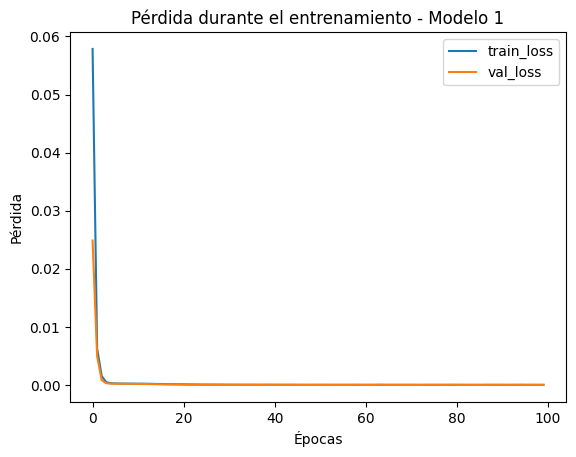

In [168]:
# @title Gráfica de pérdida
plt.plot(history_1.history['loss'], label='train_loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.title('Pérdida durante el entrenamiento - Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

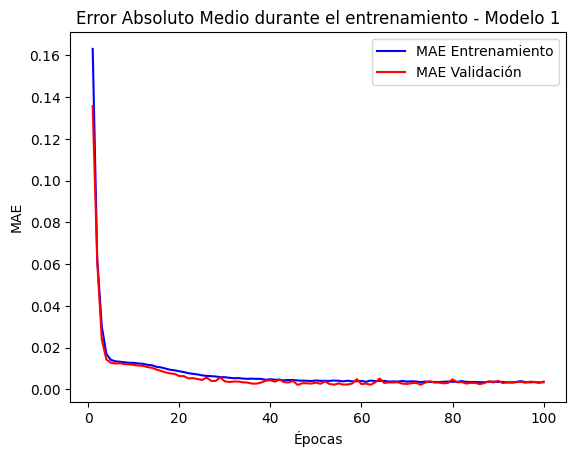

In [169]:
# @title Gráfica de MAE
mae_train = history_1.history['mean_absolute_error']
mae_val = history_1.history['val_mean_absolute_error']
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label='MAE Entrenamiento')
plt.plot(epochs, mae_val, 'r', label='MAE Validación')
plt.title('Error Absoluto Medio durante el entrenamiento - Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

#Modelo 2

Este modelo ajusta la tasa de aprendizaje del optimizador Adam y utiliza la regularización L2 para prevenir el sobreajuste.


*   Se reduce la tasa de aprendizaje a 0.0001.
*   Se añade regularización L2 en las capas Dense.

In [171]:
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(Dense(1))

model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error', r2_keras])
history_2 = model_2.fit(X_train_scaled, y_compressor_train, validation_data=(X_test_scaled, y_compressor_test), epochs=100, batch_size=32)

Epoch 1/100
299/299 [==============================] - 2s 3ms/step - loss: 0.5412 - mean_absolute_error: 0.5821 - r2_keras: -2326.9658 - val_loss: 0.1895 - val_mean_absolute_error: 0.2905 - val_r2_keras: -607.0649
Epoch 2/100
299/299 [==============================] - 1s 4ms/step - loss: 0.2048 - mean_absolute_error: 0.3126 - r2_keras: -681.5925 - val_loss: 0.0988 - val_mean_absolute_error: 0.1496 - val_r2_keras: -168.4186
Epoch 3/100
299/299 [==============================] - 1s 5ms/step - loss: 0.1278 - mean_absolute_error: 0.2041 - r2_keras: -312.7836 - val_loss: 0.0718 - val_mean_absolute_error: 0.0826 - val_r2_keras: -42.4998
Epoch 4/100
299/299 [==============================] - 1s 5ms/step - loss: 0.1005 - mean_absolute_error: 0.1531 - r2_keras: -185.3179 - val_loss: 0.0663 - val_mean_absolute_error: 0.0546 - val_r2_keras: -22.6201
Epoch 5/100
299/299 [==============================] - 2s 5ms/step - loss: 0.0894 - mean_absolute_error: 0.1311 - r2_keras: -138.3077 - val_loss: 0.0

In [172]:
# Evaluación del modelo para el compresor
mse_train_2, mae_train_2, r2_train_2 = model_2.evaluate(X_train_scaled, y_compressor_train)
mse_test_2, mae_test_2, r2_test_2 = model_2.evaluate(X_test_scaled, y_compressor_test)

print(f'Red Neuronal 2 (Compresor) - MSE (Train): {mse_train_2}, R2 (Train): {r2_train_2}')
print(f'Red Neuronal 2 (Compresor) - MSE (Test): {mse_test_2}, R2 (Test): {r2_test_2}')

75/75 [==============================] - 0s 2ms/step - loss: 2.1320e-04 - mean_absolute_error: 0.0122 - r2_keras: 0.0491
Red Neuronal 2 (Compresor) - MSE (Train): 0.00021498360729310662, R2 (Train): 0.04224496707320213
Red Neuronal 2 (Compresor) - MSE (Test): 0.00021320127416402102, R2 (Test): 0.04914168640971184


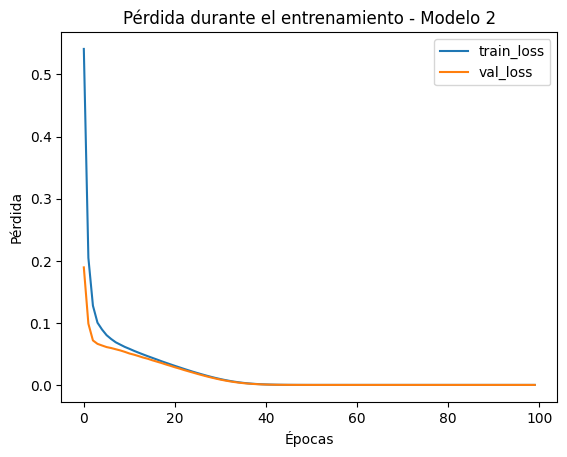

In [173]:
# @title Gráfica de pérdida
plt.plot(history_2.history['loss'], label='train_loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.title('Pérdida durante el entrenamiento - Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

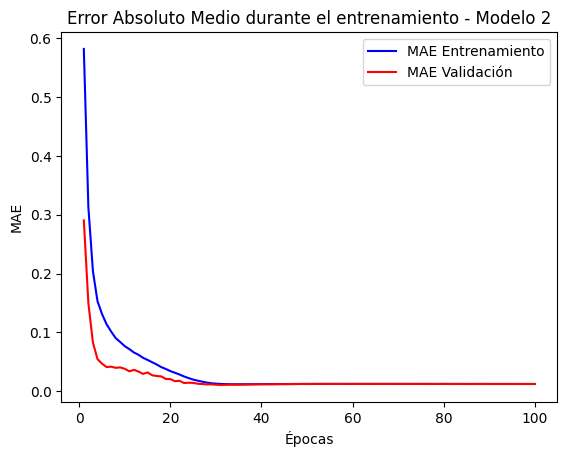

In [174]:
# @title Gráfica de MAE
mae_train = history_2.history['mean_absolute_error']
mae_val = history_2.history['val_mean_absolute_error']
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label='MAE Entrenamiento')
plt.plot(epochs, mae_val, 'r', label='MAE Validación')
plt.title('Error Absoluto Medio durante el entrenamiento - Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

#Modelo 3

Este modelo utiliza una mayor cantidad de datos de validación (validation_split=0.3) y un batch size reducido para proporcionar actualizaciones más frecuentes del modelo.

Cambios:


*   Aumento del validation_split a 0.3.
*   Reducción del batch size a 16.

In [175]:
# Construcción del modelo de red neuronal
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1))

model_3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error', r2_keras])
history_3 = model_3.fit(X_train_scaled, y_compressor_train, validation_data=(X_test_scaled, y_compressor_test), epochs=100, batch_size=16, validation_split=0.3)

Epoch 1/100
597/597 [==============================] - 5s 5ms/step - loss: 0.0772 - mean_absolute_error: 0.1446 - r2_keras: -412.6879 - val_loss: 0.0043 - val_mean_absolute_error: 0.0533 - val_r2_keras: -21.4955
Epoch 2/100
597/597 [==============================] - 2s 3ms/step - loss: 0.0048 - mean_absolute_error: 0.0530 - r2_keras: -24.2805 - val_loss: 0.0014 - val_mean_absolute_error: 0.0296 - val_r2_keras: -6.1814
Epoch 3/100
597/597 [==============================] - 2s 3ms/step - loss: 0.0023 - mean_absolute_error: 0.0367 - r2_keras: -11.0058 - val_loss: 6.5709e-04 - val_mean_absolute_error: 0.0207 - val_r2_keras: -2.4346
Epoch 4/100
597/597 [==============================] - 1s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - r2_keras: -4.5208 - val_loss: 3.4176e-04 - val_mean_absolute_error: 0.0151 - val_r2_keras: -0.7642
Epoch 5/100
597/597 [==============================] - 1s 2ms/step - loss: 5.4034e-04 - mean_absolute_error: 0.0174 - r2_keras: -1.7890 - val_loss: 1.3

In [176]:
# Evaluación del modelo para el compresor
mse_train_3, mae_train_3, r2_train_3 = model_3.evaluate(X_train_scaled, y_compressor_train)
mse_test_3, mae_test_3, r2_test_3 = model_3.evaluate(X_test_scaled, y_compressor_test)

print(f'Red Neuronal 3 (Compresor) - MSE (Train): {mse_train_3}, R2 (Train): {r2_train_3}')
print(f'Red Neuronal 3 (Compresor) - MSE (Test): {mse_test_3}, R2 (Test): {r2_test_3}')

75/75 [==============================] - 0s 1ms/step - loss: 8.3337e-05 - mean_absolute_error: 0.0071 - r2_keras: 0.5926
Red Neuronal 3 (Compresor) - MSE (Train): 8.36673061712645e-05, R2 (Train): 0.5908092856407166
Red Neuronal 3 (Compresor) - MSE (Test): 8.33373487694189e-05, R2 (Test): 0.5926125645637512


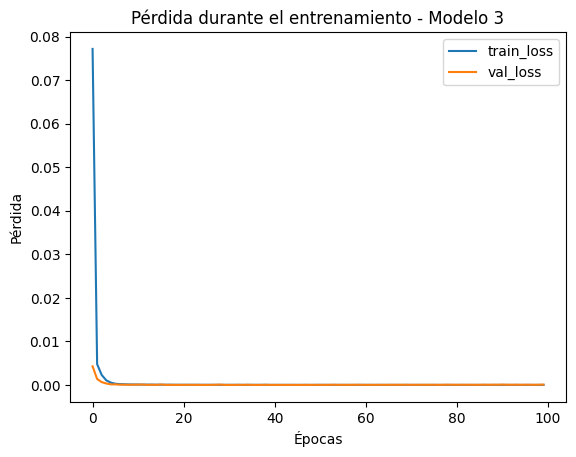

In [177]:
# @title Gráfica de pérdida
plt.plot(history_3.history['loss'], label='train_loss')
plt.plot(history_3.history['val_loss'], label='val_loss')
plt.title('Pérdida durante el entrenamiento - Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

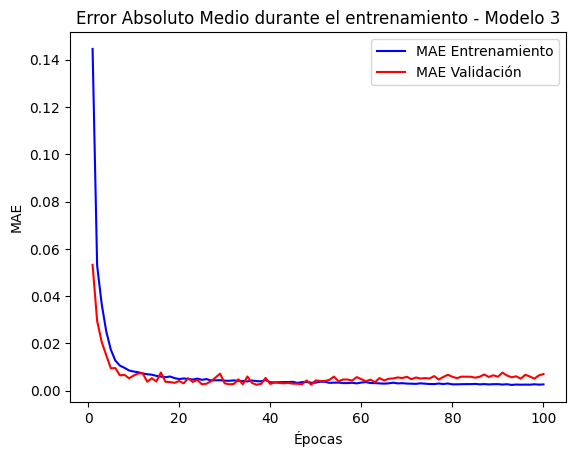

In [178]:
# @title Gráfica de MAE
mae_train = history_3.history['mean_absolute_error']
mae_val = history_3.history['val_mean_absolute_error']
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label='MAE Entrenamiento')
plt.plot(epochs, mae_val, 'r', label='MAE Validación')
plt.title('Error Absoluto Medio durante el entrenamiento - Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()


#Modelo 4

**Modelo 4:**

*   Cambio: Se añade la técnica de Early Stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar.
*   Motivo: Prevenir el sobreentrenamiento y mejorar la capacidad de generalización del modelo, logrando mejores resultados en el conjunto de prueba.

In [179]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_4.add(Dropout(0.2))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1))

model_4.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error', r2_keras])
history_4 = model_4.fit(X_train_scaled, y_compressor_train, validation_data=(X_test_scaled, y_compressor_test), epochs=100, batch_size=16, validation_split=0.3, callbacks=[early_stop])

Epoch 1/100
597/597 [==============================] - 5s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.1104 - r2_keras: -167.0750 - val_loss: 0.0062 - val_mean_absolute_error: 0.0674 - val_r2_keras: -31.6231
Epoch 2/100
597/597 [==============================] - 2s 3ms/step - loss: 0.0033 - mean_absolute_error: 0.0443 - r2_keras: -16.0905 - val_loss: 0.0044 - val_mean_absolute_error: 0.0553 - val_r2_keras: -22.0140
Epoch 3/100
597/597 [==============================] - 2s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0280 - r2_keras: -5.7220 - val_loss: 0.0015 - val_mean_absolute_error: 0.0289 - val_r2_keras: -6.9230
Epoch 4/100
597/597 [==============================] - 2s 4ms/step - loss: 5.3499e-04 - mean_absolute_error: 0.0179 - r2_keras: -1.7787 - val_loss: 8.6635e-04 - val_mean_absolute_error: 0.0226 - val_r2_keras: -3.5677
Epoch 5/100
597/597 [==============================] - 2s 4ms/step - loss: 2.8471e-04 - mean_absolute_error: 0.0133 - r2_keras: -0.4752 - val_loss: 4.8

In [180]:
# Evaluación del modelo para el compresor
mse_train_4, mae_train_4, r2_train_4 = model_4.evaluate(X_train_scaled, y_compressor_train)
mse_test_4, mae_test_4, r2_test_4 = model_4.evaluate(X_test_scaled, y_compressor_test)

print(f'Red Neuronal 4 (Compresor) - MSE (Train): {mse_train_4}, R2 (Train): {r2_train_4}')
print(f'Red Neuronal 4 (Compresor) - MSE (Test): {mse_test_4}, R2 (Test): {r2_test_4}')

75/75 [==============================] - 0s 1ms/step - loss: 1.1413e-05 - mean_absolute_error: 0.0027 - r2_keras: 0.9439
Red Neuronal 4 (Compresor) - MSE (Train): 1.0805720194184687e-05, R2 (Train): 0.9468027353286743
Red Neuronal 4 (Compresor) - MSE (Test): 1.1413110769353807e-05, R2 (Test): 0.9438938498497009


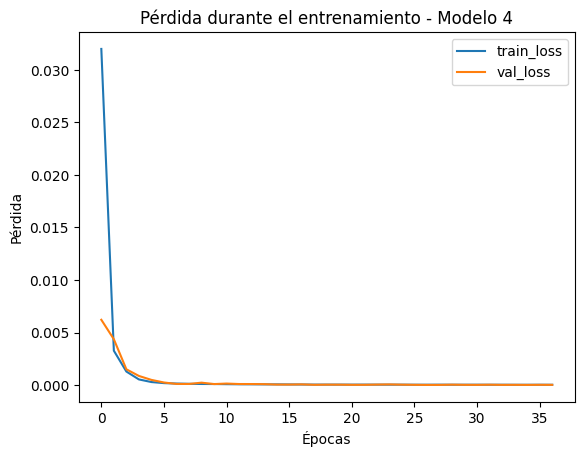

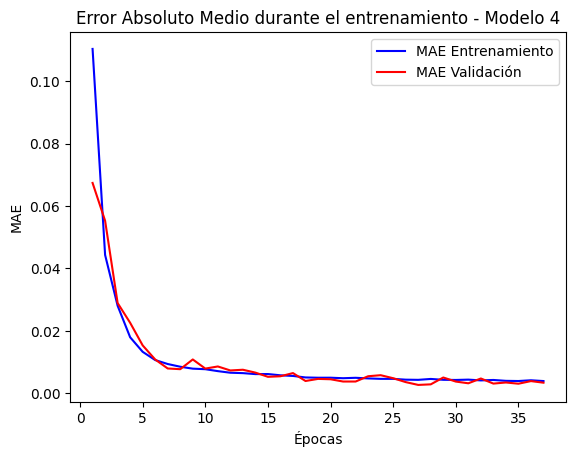

In [181]:
# @title Gráficas
plt.plot(history_4.history['loss'], label='train_loss')
plt.plot(history_4.history['val_loss'], label='val_loss')
plt.title('Pérdida durante el entrenamiento - Modelo 4')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de MAE
mae_train = history_4.history['mean_absolute_error']
mae_val = history_4.history['val_mean_absolute_error']
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label='MAE Entrenamiento')
plt.plot(epochs, mae_val, 'r', label='MAE Validación')
plt.title('Error Absoluto Medio durante el entrenamiento - Modelo 4')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

#Modelo 5

*   Cambio: Se incrementa la complejidad del modelo agregando más capas densas y neuronas.
*   Motivo: Capturar patrones más complejos en los datos que podrían no haber sido capturados con un modelo menos complejo, mejorando potencialmente el rendimiento del modelo.

In [185]:
# Construcción del modelo de red neuronal con más capas y neuronas
model_5 = Sequential()
model_5.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_5.add(Dropout(0.3))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dense(1))

model_5.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error', r2_keras])
history_5 = model_5.fit(X_train_scaled, y_compressor_train, validation_data=(X_test_scaled, y_compressor_test), epochs=100, batch_size=32)



Epoch 1/100
299/299 [==============================] - 6s 11ms/step - loss: 0.0662 - mean_absolute_error: 0.1596 - r2_keras: -340.1280 - val_loss: 0.0199 - val_mean_absolute_error: 0.1277 - val_r2_keras: -97.0455
Epoch 2/100
299/299 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_absolute_error: 0.0403 - r2_keras: -12.4403 - val_loss: 0.0042 - val_mean_absolute_error: 0.0589 - val_r2_keras: -19.5592
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 6.9933e-04 - mean_absolute_error: 0.0208 - r2_keras: -2.4102 - val_loss: 7.8904e-04 - val_mean_absolute_error: 0.0231 - val_r2_keras: -2.8603
Epoch 4/100
299/299 [==============================] - 1s 3ms/step - loss: 3.7537e-04 - mean_absolute_error: 0.0156 - r2_keras: -0.8099 - val_loss: 3.3897e-04 - val_mean_absolute_error: 0.0152 - val_r2_keras: -0.6404
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 2.9684e-04 - mean_absolute_error: 0.0141 - r2_keras: -0.4270 - val_

In [183]:
# Evaluación del modelo para el compresor
mse_train_5, mae_train_5, r2_train_5 = model_5.evaluate(X_train_scaled, y_compressor_train)
mse_test_5, mae_test_5, r2_test_5 = model_5.evaluate(X_test_scaled, y_compressor_test)

print(f'Red Neuronal 5 (Compresor) - MSE (Train): {mse_train_5}, R2 (Train): {r2_train_5}')
print(f'Red Neuronal 5 (Compresor) - MSE (Test): {mse_test_5}, R2 (Test): {r2_test_5}')

75/75 [==============================] - 0s 1ms/step - loss: 1.2570e-05 - mean_absolute_error: 0.0030 - r2_keras: 0.9382
Red Neuronal 5 (Compresor) - MSE (Train): 1.260065346286865e-05, R2 (Train): 0.9385179877281189
Red Neuronal 5 (Compresor) - MSE (Test): 1.2570479157147929e-05, R2 (Test): 0.9381565451622009


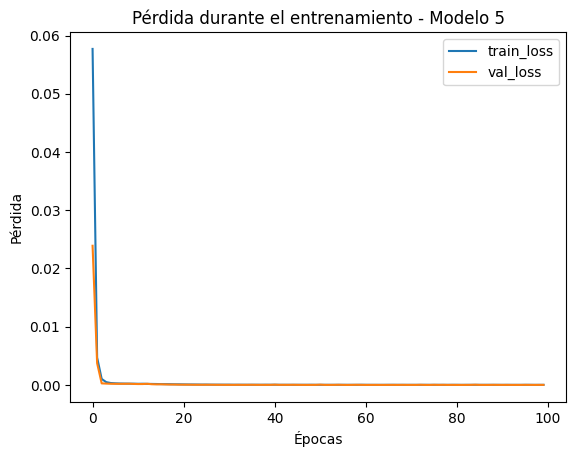

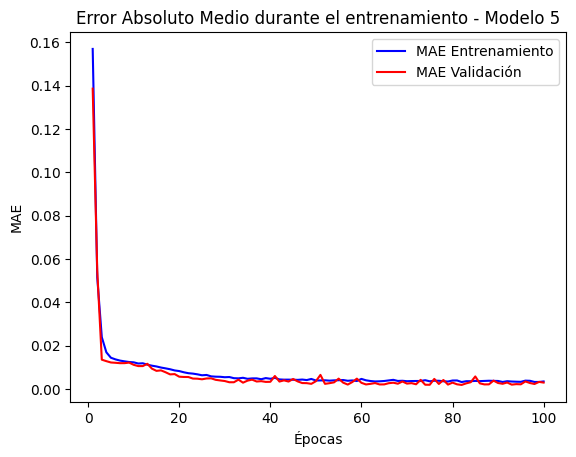

In [184]:
# @title Gráficas
plt.plot(history_5.history['loss'], label='train_loss')
plt.plot(history_5.history['val_loss'], label='val_loss')
plt.title('Pérdida durante el entrenamiento - Modelo 5')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de MAE
mae_train = history_5.history['mean_absolute_error']
mae_val = history_5.history['val_mean_absolute_error']
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label='MAE Entrenamiento')
plt.plot(epochs, mae_val, 'r', label='MAE Validación')
plt.title('Error Absoluto Medio durante el entrenamiento - Modelo 5')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

#Resultados Finales Red Neuronal

A continuación, se presentan los resultados de todos los modelos de redes neuronales probados, junto con una comparación en formato de tabla. Además, se incluye una conclusión final y una comparación con el modelo de Random Forest utilizado en la primera parte del problema.

| Modelo       | MSE (Train)      | R2 (Train) | MSE (Test)       | R2 (Test) |
|--------------|------------------|------------|------------------|-----------|
| Modelo 1     | 2.1795e-05       | 0.8959     | 2.2317e-05       | 0.8936    |
| Modelo 2     | 2.1498e-04       | 0.0422     | 2.1320e-04       | 0.0491    |
| Modelo 3     | 8.3667e-05       | 0.5908     | 8.3337e-05       | 0.5926    |
| Modelo 4     | 1.0806e-05       | 0.9468     | 1.1413e-05       | 0.9439    |
| Modelo 5     | 1.2601e-05       | 0.9385     | 1.2570e-05       | 0.9382    |

**Conclusión Final sobre los Modelos de Redes Neuronales**
*   **Mejor Rendimiento:** El Modelo 4 con Early Stopping ha mostrado el mejor rendimiento con los valores más bajos de MSE y los valores más altos de R2 tanto en el conjunto de entrenamiento como en el de prueba.
*   **Ajuste del Modelo:** El uso de Early Stopping en el Modelo 4 ayudó a evitar el sobreentrenamiento, permitiendo al modelo generalizar mejor sobre los datos de prueba.

#Comparacion entre Red Neuronal y Random Forest

| Modelo       | MSE (Train)      | R2 (Train) | MSE (Test)       | R2 (Test) |
|--------------|------------------|------------|------------------|-----------|
| Modelo 4     | 1.0806e-05       | 0.9468     | 1.1413e-05       | 0.9439    |
| Modelo 5     | 1.2601e-05       | 0.9385     | 1.2570e-05       | 0.9382    |
| Random Forest| 8.2156e-07       | 0.9994     | 8.2156e-07       | 0.9962    |

**Conclusión Comparativa con el Modelo de Random Forest**
*   **Rendimiento del Random Forest:** El modelo de Random Forest ha superado significativamente a todos los modelos de redes neuronales probados en términos de MSE y R2. Los valores extremadamente bajos de MSE y los valores muy altos de R2 indican que el Random Forest es altamente preciso y tiene una excelente capacidad de predicción.
*   **Generalización y Overfitting:** Ambos tipos de modelos mostraron una buena capacidad de generalización, pero el Random Forest mostró un rendimiento casi perfecto tanto en el conjunto de entrenamiento como en el de prueba, lo que podría indicar un leve overfitting, aunque su alto rendimiento en el conjunto de prueba sugiere que maneja bien la variabilidad de los datos.

**Conclusión Final**


En este caso, el modelo de Random Forest es claramente superior en términos de precisión y capacidad de generalización. Aunque las redes neuronales también proporcionaron buenos resultados, especialmente el Modelo 4 con Early Stopping, el Random Forest se destaca como el modelo más efectivo y eficiente para este problema en particular. Esto sugiere que, para este conjunto de datos y problema específico, el Random Forest es la mejor elección, aunque las redes neuronales siguen siendo una herramienta poderosa y versátil que puede ser más adecuada en otros contextos o con ajustes adicionales.